<a href="https://colab.research.google.com/github/sogand73/OCT-Classification/blob/main/without_dictionary_learning_for_OCT_(Kermany_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
from PIL import Image
import cv2
import shutil
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import MiniBatchDictionaryLearning
from joblib import dump, load

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.0/705.0 kB 7.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# @title Data preparing

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download paultimothymooney/kermany2018/

100% 10.8G/10.8G [06:27<00:00, 36.7MB/s]
100% 10.8G/10.8G [06:27<00:00, 30.0MB/s]


In [ ]:
!unzip kermany2018.zip

Streaming output truncated to the last 5000 lines.
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8050636-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-2.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-3.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-4.jpeg  
  inflating: oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-5.jpeg  
  inflating: 

In [ ]:
#@title Classification using YOLOv8

In [ ]:
!pip install ultralytics

In [ ]:
shutil.rmtree('/content/oct_my_dataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_dataset'

In [ ]:
import os
!mkdir '/content/oct_my_dataset'
!mkdir '/content/oct_my_dataset/train'
!mkdir '/content/oct_my_dataset/test'
!mkdir '/content/oct_my_dataset/val'


In [ ]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  train_subfolder = os.path.join('/content/oct_my_dataset/train/',subfolder)
  test_subfolder = os.path.join('/content/oct_my_dataset/test/',subfolder)
  val_subfolder = os.path.join('/content/oct_my_dataset/val/',subfolder)
  os.makedirs(train_subfolder, exist_ok=True)
  os.makedirs(test_subfolder, exist_ok=True)
  os.makedirs(val_subfolder, exist_ok=True)

In [ ]:
import shutil


# Define source and destination directories
dataset_folder = '/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset'  # Replace with your source folder path
#dataset_folder = '/content/OCT2017 '  # Replace with your source folder path

destination_folder = '/content/oct_my_dataset/'  # Replace with your destination folder path

#for folder in [['train/',500], ['test/',100], ['val/',8]]
for folder in [['train/',600], ['test/',200]]:
  #for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
  for subfolder in ['NORMAL', 'DME', 'CNV']:
    # List files in the source folder
    source_folder = os.path.join(dataset_folder, folder[0], subfolder) + '/'
    files_to_copy = os.listdir(source_folder)

    # Copy each image file from the source folder to the destination folder
    for file_name in files_to_copy[:folder[1]]:
        if file_name.endswith('.jpeg'):  # Specify the image file formats
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, folder[0], subfolder) + '/'
            shutil.copy(source_path, destination_path)
            #print(f"Copied: {file_name}")


In [ ]:
#Separate and store Val data from train data
# Define source and destination directories
dataset_folder = '/content/oct_my_dataset/train/'  # Replace with your source folder path

destination_folder = '/content/oct_my_dataset/val/'  # Replace with your destination folder path



for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_copy = os.listdir(source_folder)

  # Copy each image file from the source folder to the destination folder
  for num in range(500,600):
    file_name = files_to_copy[num]
    if file_name.endswith('.jpeg'):  # Specify the image file formats
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, subfolder) + '/'
        shutil.copy(source_path, destination_path)
        #print(f"Copied: {file_name}")

In [ ]:
shutil.rmtree('/content/oct_my_trdataset')

FileNotFoundError: [Errno 2] No such file or directory: '/content/oct_my_trdataset'

In [ ]:
import os
!mkdir '/content/oct_my_trdataset'
!mkdir '/content/oct_my_trdataset/train'
!mkdir '/content/oct_my_trdataset/test'
!mkdir '/content/oct_my_dataset/val'

mkdir: cannot create directory ‘/content/oct_my_dataset/val’: File exists


In [ ]:
#classes = ['NORMAL', 'DME', 'DRUSEN', 'CNV']
classes = ['NORMAL', 'DME', 'CNV']
for subfolder in classes:
  train_subfolder = os.path.join('/content/oct_my_trdataset/train/',subfolder)
  test_subfolder = os.path.join('/content/oct_my_trdataset/test/',subfolder)
  val_subfolder = os.path.join('/content/oct_my_trdataset/val/',subfolder)
  os.makedirs(train_subfolder, exist_ok=True)
  os.makedirs(test_subfolder, exist_ok=True)
  os.makedirs(val_subfolder, exist_ok=True)

In [ ]:
import shutil


# Define source and destination directories
dataset_folder = '/content/oct_my_dataset'
#dataset_folder = '/content/OCT2017 '  # Replace with your source folder path

destination_folder = '/content/oct_my_trdataset/'  # Replace with your destination folder path

img_train = []
img_test = []
img_val = []


#for folder in [['train/',500], ['test/',100]]:
for folder in [['train/',500], ['test/',200], ['val/',100]]:
  #for subfolder in ['NORMAL', 'DME', 'DRUSEN', 'CNV']:
  for subfolder in ['NORMAL', 'DME', 'CNV']:
    # List files in the source folder
    source_folder = os.path.join(dataset_folder, folder[0], subfolder) + '/'
    files_to_copy = os.listdir(source_folder)

    # Copy each image file from the source folder to the destination folder
    for file_name in files_to_copy[:folder[1]]:
        if file_name.endswith('.jpeg'):  # Specify the image file formats
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, folder[0], subfolder) + '/'
            #shutil.copy(source_path, destination_path)
            img = Image.open(source_path) # This returns an image object
            #print(img.mode)
            #img = img.convert('RGB')
            img = np.asarray(img) # convert it to ndarray
            img = cv2.resize(img, (512, 512))
            img = img.reshape((1, 512 * 512))
            img = img.astype(float)
            img /= 255.0

            # #Normalized data
            #img -= np.mean(img, axis=0)
            #img /= np.std(img, axis=0)


            img = img*255
            img_tr = img.astype(np.uint8)

            # Save the image to the specified directory
            save_destination = os.path.join(destination_path, file_name)
            #image_to_save.save(save_destination)
            cv2.imwrite(save_destination, img_tr)

            if folder[0] == 'train/':
              img_train.append(img_tr)
            elif folder[0] == 'test/':
              img_test.append(img_tr)
            elif folder[0] == 'val/':
              img_val.append(img_tr)


            #images.append(img_tr2d)
            #print(f"Copied: {file_name}")


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the di

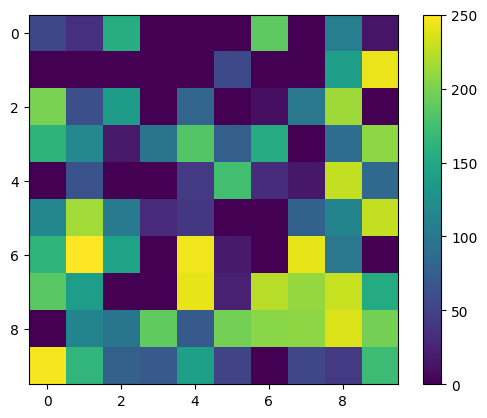

In [ ]:
plt.imshow(img_tr, interpolation='nearest')
plt.colorbar()

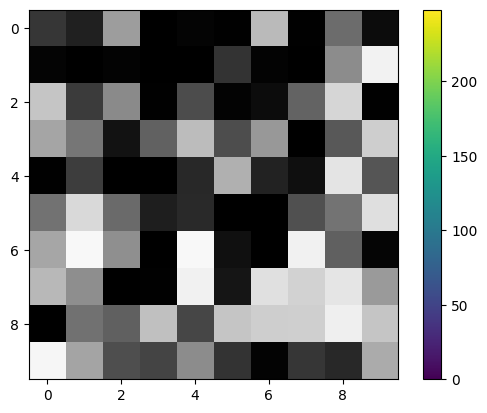

In [ ]:
c = cv2.imread(save_destination)
plt.imshow(c, interpolation='nearest')
plt.colorbar()

In [ ]:
from ultralytics import YOLO

# Load a model

#model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
#model = YOLO('/content/best.pt') #Load the initial weights, gained from the former model training on this data (previous line)

model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/oct_my_trdataset', epochs=10, imgsz=512, batch=64)

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs


100%|██████████| 5.30M/5.30M [00:00<00:00, 92.0MB/s]

YOLOv8n-cls summary: 99 layers, 2719288 parameters, 2719288 gradients, 4.4 GFLOPs
Transferred 158/158 items from pretrained weights


Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.yaml, data=/content/oct_my_trdataset, epochs=100, time=None, patience=50, batch=64, imgsz=10, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 6.23M/6.23M [00:00<00:00, 110MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[10] must be multiple of max stride 32, updating to [32]


train: Scanning /content/oct_my_trdataset/train... 1500 images, 0 corrupt: 100%|██████████| 1500/1500 [00:00<00:00, 5523.68it/s]

train: New cache created: /content/oct_my_trdataset/train.cache



val: Scanning /content/oct_my_trdataset/val... 300 images, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 4022.99it/s]

val: New cache created: /content/oct_my_trdataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.264G      1.349         64         32:  38%|███▊      | 9/24 [00:01<00:01,  8.12it/s]

      1/100     0.264G      1.365         64         32:  79%|███████▉  | 19/24 [00:02<00:00,  9.95it/s]
100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]
      1/100     0.264G      1.336         28         32: 100%|██████████| 24/24 [00:03<00:00,  6.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.39it/s]

                   all      0.373          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.262G      1.278         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.83it/s]

                   all       0.41          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.262G      1.236         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 22.29it/s]

                   all      0.453          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.262G      1.207         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.72it/s]

                   all      0.503          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.262G      1.162         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.53it/s]

                   all      0.453          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.262G      1.171         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.65it/s]

                   all      0.473          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.262G      1.132         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.95it/s]

                   all       0.51          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.262G      1.107         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.02it/s]

                   all       0.49          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.262G      1.077         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.23it/s]

                   all      0.533          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.262G      1.027         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.44it/s]

                   all       0.53          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.262G      1.012         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 36.67it/s]

                   all       0.59          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.262G     0.9828         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.33it/s]

                   all       0.65          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.262G     0.9805         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 47.32it/s]

                   all       0.63          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.262G      0.945         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.87it/s]

                   all      0.663          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.262G      0.951         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 79.30it/s]

                   all      0.757          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.262G     0.9294         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.66it/s]

                   all       0.78          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.262G     0.8882         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.22it/s]

                   all       0.79          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.262G     0.8764         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.34it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.262G     0.8547         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.15it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.262G     0.8445         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.38it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.262G     0.8452         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 47.59it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.262G     0.8319         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.82it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.262G     0.7946         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.59it/s]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.262G     0.7934         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.56it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.262G     0.8059         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.60it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.262G     0.7693         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 40.38it/s]


                   all       0.91          1

      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.262G     0.7878         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.26it/s]


                   all      0.907          1

      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.262G     0.7585         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.98it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.262G     0.7046         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.58it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.262G     0.7482         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.24it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.262G     0.7436         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.85it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.262G      0.726         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.36it/s]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.262G     0.7304         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.69it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.262G     0.7134         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.85it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.262G     0.7103         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.50it/s]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.262G     0.7542         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.87it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.262G      0.679         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 46.87it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.262G     0.6595         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 73.89it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.262G     0.6859         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.26it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.262G     0.6861         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.39it/s]

                   all      0.937          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.262G     0.6701         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.89it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.262G     0.6771         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.87it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.262G     0.6818         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.34it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.262G     0.7162         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.01it/s]


                   all       0.96          1

      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.262G     0.6456         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 20.39it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.262G     0.6588         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.66it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.262G     0.6603         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 47.69it/s]


                   all      0.963          1

      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.262G      0.651         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 35.31it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.262G     0.6365         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.57it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.262G     0.6593         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 39.29it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.262G     0.6457         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.59it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.262G     0.6143         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.33it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.262G     0.6372         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 36.92it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.262G     0.6286         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.37it/s]


                   all       0.97          1

      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.262G     0.6292         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.40it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.262G     0.5975         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 47.53it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.262G     0.5982         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.06it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.262G     0.6009         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.75it/s]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.262G     0.6136         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.35it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.262G     0.6036         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.97it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.262G     0.5859         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.93it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.262G     0.5729         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 43.11it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.262G     0.5989         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 58.53it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.262G     0.6189         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 29.97it/s]


                   all      0.983          1

      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.262G     0.5523         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.21it/s]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.262G     0.5782         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.17it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.262G     0.5637         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 34.14it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.262G     0.5792         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.83it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.262G     0.5536         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.31it/s]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.262G     0.5839         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.08it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.262G     0.5694         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.90it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.262G     0.5798         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 35.45it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.262G     0.5342         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 29.86it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.262G     0.5623         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 35.23it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.262G     0.5631         28         32: 100%|██████████| 24/24 [00:02<00:00,  9.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.87it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.262G     0.5524         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.25it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.262G     0.5392         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 53.84it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.262G      0.563         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 32.14it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.262G     0.5539         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.06it/s]


                   all      0.983          1

      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.262G     0.5394         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.56it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.262G      0.535         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.10it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.262G     0.5194         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.81it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.262G     0.5442         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.11it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.262G     0.5268         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 37.26it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.262G     0.5603         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.44it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.262G     0.5239         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.95it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.262G     0.5455         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 35.33it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.262G      0.552         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 22.41it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.262G     0.5381         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.49it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.262G     0.5344         28         32: 100%|██████████| 24/24 [00:03<00:00,  7.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.70it/s]


                   all       0.98          1

      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.262G     0.5536         28         32: 100%|██████████| 24/24 [00:03<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.92it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.262G      0.519         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.92it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.262G      0.547         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.73it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.262G     0.5118         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.87it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.262G     0.5025         28         32: 100%|██████████| 24/24 [00:02<00:00, 10.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.26it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.262G     0.5427         28         32: 100%|██████████| 24/24 [00:02<00:00,  8.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 41.85it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.262G     0.5139         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 23.75it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.262G     0.5181         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 25.80it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.262G     0.5067         28         32: 100%|██████████| 24/24 [00:01<00:00, 12.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 35.43it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.262G     0.5345         28         32: 100%|██████████| 24/24 [00:02<00:00, 11.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 30.49it/s]

                   all      0.983          1



100 epochs completed in 0.076 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/oct_my_trdataset/train... found 1500 images in 3 classes ✅ 
val: /content/oct_my_trdataset/val... found 300 images in 3 classes ✅ 
test: /content/oct_my_trdataset/test... found 600 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  6.83it/s]


                   all       0.99          1
Speed: 0.3ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [ ]:
# Validate the modelblob:https://colab.research.google.com/f8428635-acf6-400f-b52f-379198002792
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy

Ultralytics YOLOv8.1.6 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/oct_my_trdataset/train... found 1500 images in 3 classes ✅ 
val: /content/oct_my_trdataset/val... found 300 images in 3 classes ✅ 
test: /content/oct_my_trdataset/test... found 600 images in 3 classes ✅ 


val: Scanning /content/oct_my_trdataset/val... 300 images, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.66it/s]


                   all       0.99          1
Speed: 0.0ms preprocess, 2.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


0.9900000095367432

In [ ]:
# @title Predict using the model



In [ ]:
#test_score = model.predict(source='/content/oct_my_trdataset/test/Normal')
#0:AMD 1:DME 2:Normal
label_predict = []
label_conf = []
label_true = []

test_path = '/content/oct_my_trdataset/test/'

for subfolder in ['NORMAL', 'DME', 'CNV']:
  test_img_dir = os.path.join(test_path, subfolder)
  test_img = model(test_img_dir)

  for num in range(200):
    label_true.append(subfolder)
    label_predict.append(test_img[num].names[test_img[num].probs.top1])
    label_conf.append(test_img[num].probs.top1conf)

print(label_true)
print(label_predict)
print(label_conf)


image 1/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-101880-1.jpeg: 32x32 NORMAL 0.98, DME 0.02, CNV 0.00, 5.9ms
image 2/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1025847-1.jpeg: 32x32 CNV 0.41, NORMAL 0.41, DME 0.18, 5.3ms
image 3/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1038998-1.jpeg: 32x32 NORMAL 0.99, DME 0.01, CNV 0.00, 5.2ms
image 4/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1042462-1.jpeg: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 5.1ms
image 5/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1058176-1.jpeg: 32x32 NORMAL 0.99, DME 0.01, CNV 0.00, 5.1ms
image 6/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1063128-1.jpeg: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 16.1ms
image 7/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1073137-1.jpeg: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 5.0ms
image 8/200 /content/oct_my_trdataset/test/NORMAL/NORMAL-1081406-1.jpeg: 32x32 NORMAL 0.99, DME 0.01, CNV 0.01, 5.2ms
image 9/200 /content/oct_my_trdataset/test/NORMAL/NORMA

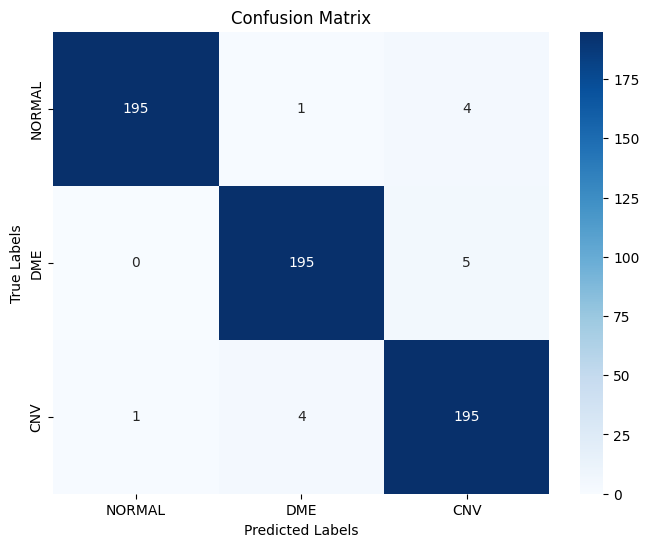

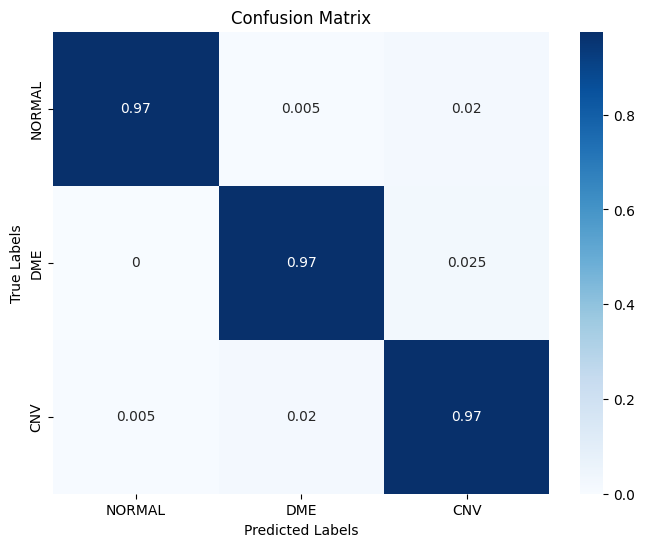

True

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(label_true, label_predict, labels=['NORMAL', 'DME', 'CNV'])
conf_matrix_norm = confusion_matrix(label_true, label_predict, labels=['NORMAL', 'DME', 'CNV'], normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'DME', 'CNV'], yticklabels=['NORMAL', 'DME', 'CNV'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Convert the heatmap to an image
heatmap_image = np.array(heatmap.get_figure().canvas.renderer.buffer_rgba())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap_norm = sns.heatmap(conf_matrix_norm, annot=True, cmap='Blues', xticklabels=['NORMAL', 'DME', 'CNV'], yticklabels=['NORMAL', 'DME', 'CNV'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Convert the heatmap to an image
heatmap_norm_image = np.array(heatmap_norm.get_figure().canvas.renderer.buffer_rgba())

cv2.imwrite('/content/oct_my_trdataset/test/conf_matrix.jpeg', heatmap_image)
cv2.imwrite('/content/oct_my_trdataset/test/conf_matrix_norm.jpeg', heatmap_norm_image)

In [ ]:
#@title Inference time calculation on the test data

In [ ]:
import os
import datetime
import numpy as np
import cv2
!pip install ultralytics
from ultralytics import YOLO

model_classification = YOLO('/content/runs/classify/train/weights/best.pt') # build from YAML and transfer weights


In [ ]:
#Define an inference time function
def inference(img, model_dict, model_classification):
  start_time = datetime.datetime.now()

  # your functions
  #data transforming using dictionary learning
  img = np.asarray(img) # convert it to ndarray
  img = cv2.resize(img, (512, 512))
  img = img.astype(float)
  img /= 255.0
  img_tr = img*255
  img_tr = img_tr.astype(np.uint8)

  #predict the class using YOLOv8
  classification_result = model_classification(img_tr)
  final_label = classification_result[0].names[classification_result[0].probs.top1])


  end_time = datetime.datetime.now()
  elapsed_time = end_time - start_time
  #print(f"{elapsed_time=}")

  return final_label, elapsed_time


In [ ]:
#Images importing
from PIL import Image

img_list = []
dataset_folder = '/content/oct_my_dataset/test/'  # Replace with your source folder path
for subfolder in ['NORMAL', 'DME', 'CNV']:
  # List files in the source folder
  source_folder = os.path.join(dataset_folder, subfolder) + '/'
  files_to_open = os.listdir(source_folder)

  # Open each image file from the source folder
  for img_name in files_to_open[:10]:
    img_dir = os.path.join(source_folder, img_name)
    image = Image.open(img_dir) # This returns an image object
    img_list.append(image)

In [ ]:
#Inference time calculation

label_list = []
inference_list = []
for img in img_list:
  label, time = inference(img, model_classification)
  label_list.append(label)
  inference_list.append(time)


0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 9.9ms
Speed: 6.2ms preprocess, 9.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 4.7ms
Speed: 5.0ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.98, DME 0.02, NORMAL 0.00, 4.6ms
Speed: 3.8ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 4.7ms
Speed: 1.9ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 4.6ms
Speed: 5.5ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.88, CNV 0.12, NORMAL 0.00, 5.2ms
Speed: 4.8ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.96, CNV 0.03, DME 0.01, 4.7ms
Speed: 4.4ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 4.4ms
Speed: 5.0ms preprocess, 4.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 4.7ms
Speed: 2.3ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.98, CNV 0.01, DME 0.00, 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)

0: 32x32 DME 0.97, CNV 0.03, NORMAL 0.00, 5.6ms
Speed: 1.7ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 4.4ms
Speed: 1.7ms preprocess, 4.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 4.7ms
Speed: 2.9ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 4.7ms
Speed: 3.9ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.94, NORMAL 0.06, DME 0.01, 4.7ms
Speed: 2.9ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 4.7ms
Speed: 2.7ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 4.6ms
Speed: 2.7ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 5.2ms
Speed: 6.9ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, CNV 0.01, DME 0.00, 5.1ms
Speed: 3.1ms preprocess, 5.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.89, CNV 0.11, NORMAL 0.00, 4.6ms
Speed: 2.5ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.97, DME 0.02, NORMAL 0.01, 5.7ms
Speed: 4.6ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 4.6ms
Speed: 2.8ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.99, CNV 0.01, NORMAL 0.00, 9.3ms
Speed: 8.9ms preprocess, 9.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 4.8ms
Speed: 3.3ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.93, CNV 0.06, DME 0.01, 7.1ms
Speed: 3.0ms preprocess, 7.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.97, CNV 0.03, NORMAL 0.00, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.01, DME 0.00, 7.5ms
Speed: 3.3ms preprocess, 7.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.92, DME 0.05, NORMAL 0.04, 14.7ms
Speed: 2.1ms preprocess, 14.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.58, CNV 0.41, NORMAL 0.00, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.00, DME 0.00, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.87, DME 0.11, CNV 0.02, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 11.4ms
Speed: 4.0ms preprocess, 11.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.92, CNV 0.08, DME 0.01, 14.2ms
Speed: 2.5ms preprocess, 14.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.98, CNV 0.01, NORMAL 0.01, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 5.9ms
Speed: 5.0ms preprocess, 5.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 9.9ms
Speed: 5.1ms preprocess, 9.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 5.7ms
Speed: 3.9ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.97, DME 0.03, NORMAL 0.00, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 11.7ms
Speed: 3.9ms preprocess, 11.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 6.6ms
Speed: 3.3ms preprocess, 6.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.64, DME 0.22, NORMAL 0.14, 4.6ms
Speed: 1.7ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, DME 0.01, CNV 0.00, 4.4ms
Speed: 1.8ms preprocess, 4.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.79, NORMAL 0.20, CNV 0.01, 4.6ms
Speed: 1.6ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.01, DME 0.00, 5.3ms
Speed: 1.7ms preprocess, 5.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 4.6ms
Speed: 1.5ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.97, NORMAL 0.03, CNV 0.00, 4.4ms
Speed: 1.8ms preprocess, 4.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.96, NORMAL 0.03, DME 0.01, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.52, NORMAL 0.46, CNV 0.02, 4.5ms
Speed: 1.8ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 4.4ms
Speed: 1.8ms preprocess, 4.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.69, CNV 0.29, DME 0.02, 4.5ms
Speed: 2.2ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.97, DME 0.03, CNV 0.00, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 5.2ms
Speed: 2.0ms preprocess, 5.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 5.0ms
Speed: 1.9ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, DME 0.01, CNV 0.00, 5.0ms
Speed: 1.8ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 4.6ms
Speed: 1.6ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.01, DME 0.00, 4.5ms
Speed: 1.9ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, DME 0.01, CNV 0.00, 4.6ms
Speed: 1.7ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.99, CNV 0.01, NORMAL 0.00, 5.0ms
Speed: 1.9ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 4.3ms
Speed: 2.1ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 6.1ms
Speed: 1.7ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)

0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 5.0ms
Speed: 2.1ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 5.7ms
Speed: 2.4ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 4.7ms
Speed: 2.4ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.99, NORMAL 0.01, CNV 0.00, 4.5ms
Speed: 2.4ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 4.8ms
Speed: 2.3ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 10.5ms
Speed: 2.6ms preprocess, 10.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 4.6ms
Speed: 1.6ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 4.7ms
Speed: 3.3ms preprocess, 4.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, DME 0.00, CNV 0.00, 4.6ms
Speed: 3.4ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 4.8ms
Speed: 3.4ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.71, CNV 0.26, NORMAL 0.03, 9.3ms
Speed: 3.7ms preprocess, 9.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.81, DME 0.18, CNV 0.01, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)



/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


0: 32x32 DME 0.99, CNV 0.01, NORMAL 0.00, 5.6ms
Speed: 2.0ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)

0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 5.4ms
Speed: 1.7ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.88, DME 0.09, CNV 0.03, 15.2ms
Speed: 1.6ms preprocess, 15.2ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, NORMAL 0.00, CNV 0.00, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.99, NORMAL 0.01, DME 0.00, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.99, DME 0.01, CNV 0.00, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 6.3ms
Speed: 2.6ms preprocess, 6.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, DME 0.00, NORMAL 0.00, 6.6ms
Speed: 2.4ms preprocess, 6.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 6.9ms
Speed: 4.9ms preprocess, 6.9ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 10.1ms
Speed: 4.1ms preprocess, 10.1ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 6.4ms
Speed: 2.6ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 0.95, DME 0.04, CNV 0.02, 5.7ms
Speed: 1.7ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 0.99, NORMAL 0.01, CNV 0.00, 4.6ms
Speed: 2.5ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 1.00, NORMAL 0.00, DME 0.00, 6.6ms
Speed: 2.2ms preprocess, 6.6ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 NORMAL 1.00, CNV 0.00, DME 0.00, 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 DME 1.00, CNV 0.00, NORMAL 0.00, 7.0ms
Speed: 3.1ms preprocess, 7.0ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(



0: 32x32 CNV 0.89, NORMAL 0.06, DME 0.05, 4.5ms
Speed: 4.0ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


In [ ]:
#print the inference time
inference_mean = np.mean(inference_list)
print(f"{inference_mean=}")

inference_mean=datetime.timedelta(microseconds=850631)


In [ ]:
#@title Save folders and experiments on the Google Drive

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_dataset')

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/oct_my_trdataset')

In [ ]:
#shutil.rmtree('/content/drive/MyDrive/oct_classification/kermany_dataset/runs')

In [ ]:
#copy folders to google drive
shutil.copytree("/content/oct_my_dataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/test12/oct_my_dataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test12/oct_my_dataset'

In [ ]:
shutil.copytree("/content/oct_my_trdataset", "/content/drive/MyDrive/oct_classification/kermany_dataset/test12/oct_my_trdataset")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test12/oct_my_trdataset'

In [ ]:
shutil.copytree("/content/runs", "/content/drive/MyDrive/oct_classification/kermany_dataset/test12/runs")

'/content/drive/MyDrive/oct_classification/kermany_dataset/test12/runs'

In [ ]:
#@title Dictlearn tests - incomplete

In [ ]:
!git clone https://github.com/permfl/dictlearn.git /content/dictlearn

Cloning into '/content/dictlearn'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 152 (delta 1), reused 2 (delta 0), pack-reused 145
Receiving objects: 100% (152/152), 2.11 MiB | 8.41 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
!pip install dictlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
%cd /content/dictlearn
!pip install --file requirements.txt

/content/dictlearn

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --file


In [ ]:
!python setup.py install

Installing dictlearn...
Compiling /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pyx because it changed.
Compiling /content/dictlearn/dictlearn/_dictlearn/hessian.pyx because it changed.
[1/2] Cythonizing /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/dictlearn/dictlearn/_dictlearn/_dictlearn.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing /content/dictlearn/dictlearn/_dictlearn/hessian.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/dictlearn/dictlearn/_dictlearn/hessian.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running install
/usr/local/lib/python3.10/dist-packag

In [ ]:
import dictlearn as dl
dictionary = dl.dct_dict(256, 8)

AttributeError: module 'dictlearn' has no attribute 'dct_dict'

In [ ]:
import dictlearn as dl
dl.
image = dl.imread('examples/images/house.png')
image_patches = dl.Patches(image, 8)
matrix = image_patches.patches
matrix.shape

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
import matplotlib.pyplot as plt
import dictlearn as dl

denoise = dl.Denoise('noisy_image.png')
denoised_image = denoise.train().denoise()
plt.imshow(denoised_image)
plt.show()

AttributeError: module 'dictlearn' has no attribute 'Denoise'

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
!pip show dictlearn

Name: dictlearn
Version: 0.2.1
Summary: Dictionary Learning Toolbox
Home-page: https://gitlab.com/unibuc/graphomaly/dictionary-learning
Author: Paul Irofti, Denis Ilie-Ablachim, Bogdan Dumitrescu
Author-email: graphomaly@fmi.unibuc.ro
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy
Required-by: 


In [ ]:
print(dir(dl))
dl.kernels()

['DictionaryLearning', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_dictionary_learning', '_get_fit_handle', 'dictionary_learning', 'kernel_dictionary_learning', 'kernels', 'methods', 'online_dictionary_learning', 'sparse_encode']


In [ ]:
import matplotlib.pyplot as plt
import dictlearn as dl
dl.
inpainter = dl.inpaint('image.png', 'mask.png')
inpainted_image = inpainter.train().inpaint()

plt.subplot(121)
plt.imshow(inpainter.patches.image)
plt.title('Original')

plt.subplot(122)
plt.imshow(inpainted_image)
plt.title('Inpainted')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'inpaint'

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2


image = cv2.imread('images/vessel.png')
patches = dl.Patches(image, size=4)
labels = dl.detection.smallest_cluster(patches.patches.T, 2, True)

# Adjust alpha to change the weight for the enhanced image
if len(sys.argv) == 2:
    alpha = float(sys.argv[1])
else:
    alpha = 0.2

vessels = patches.patches * labels
new = alpha*patches.patches + (1 - alpha)*vessels
enhanced = patches.reconstruct(new)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(enhanced)
plt.axis('off')
plt.title('Enhanced')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/CNV-1016042-1.jpeg')

In [ ]:
import sys
import dictlearn as dl
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/CNV-1016042-1.jpeg')
patches = dl.Patches(image, size=4)
labels = dl.detection.smallest_cluster(patches.patches.T, 2, True)

# Adjust alpha to change the weight for the enhanced image
if len(sys.argv) == 2:
    alpha = float(sys.argv[1])
else:
    alpha = 0.2

vessels = patches.patches * labels
new = alpha*patches.patches + (1 - alpha)*vessels
enhanced = patches.reconstruct(new)

plt.subplot(121)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(enhanced)
plt.axis('off')
plt.title('Enhanced')

plt.show()

AttributeError: module 'dictlearn' has no attribute 'Patches'

In [ ]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
import time

import numpy as np

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

print("Learning the dictionary... ")
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True, n_init=3)
patch_size = (30, 30)

buffer = []
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print("Partial fit of %4i out of %i" % (index, 6 * len(faces.images)))

dt = time.time() - t0
print("done in %.2fs." % dt)

Learning the dictionary... 
[MiniBatchKMeans] Reassigning 3 cluster centers.
Partial fit of  100 out of 2400
[MiniBatchKMeans] Reassigning 10 cluster centers.
Partial fit of  200 out of 2400
[MiniBatchKMeans] Reassigning 10 cluster centers.
[MiniBatchKMeans] Reassigning 2 cluster centers.
Partial fit of  300 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  400 out of 2400
[MiniBatchKMeans] Reassigning 1 cluster centers.
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Part

In [ ]:
a = faces.images

In [ ]:
a.dtype

dtype('float32')

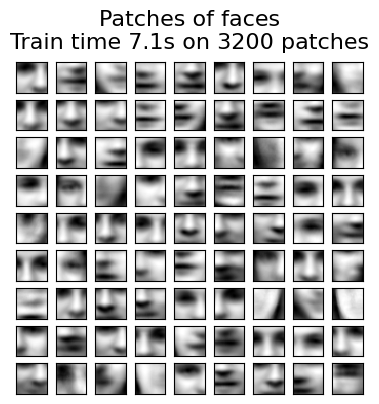

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())


plt.suptitle(
    "Patches of faces\nTrain time %.1fs on %d patches" % (dt, 8 * len(faces.images)),
    fontsize=16,
)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()